In [1]:
##Shift + Enter : Run cell
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

2024-03-31 15:55:23.560268: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 15:55:23.912358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 15:55:23.912446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 15:55:23.974048: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 15:55:24.107153: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 15:55:24.109255: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
##Constants
FOLDER = "MRLDataset/"
ce = "closed_eye"
oe = "open_eye"

In [3]:
pth = os.path.join(FOLDER,oe)
print(pth)

MRLDataset/open_eye


In [4]:
os.listdir(pth)

['s0032_03509_0_0_1_0_0_02.png',
 's0014_06249_0_0_1_0_1_01.png',
 's0030_00956_0_0_1_0_1_01.png',
 's0030_00975_0_0_1_0_1_01.png',
 's0001_02017_0_0_1_0_0_01.png',
 's0032_06162_0_0_1_0_0_02.png',
 's0037_06401_1_0_1_0_0_01.png',
 's0020_00648_0_0_1_0_0_01.png',
 's0001_02777_0_1_1_2_0_01.png',
 's0014_04009_0_0_1_0_0_01.png',
 's0031_00972_1_0_1_0_1_02.png',
 's0002_01066_0_0_1_0_0_01.png',
 's0033_00503_0_0_1_0_1_01.png',
 's0019_05341_0_0_1_0_0_01.png',
 's0032_05470_0_0_1_2_1_02.png',
 's0014_04433_0_0_1_0_1_03.png',
 's0025_00426_0_0_1_0_0_01.png',
 's0032_02676_0_1_1_2_1_02.png',
 's0032_02119_0_1_1_2_1_02.png',
 's0025_01136_0_0_1_0_1_01.png',
 's0025_00889_0_0_1_0_0_01.png',
 's0012_05310_0_0_1_0_1_03.png',
 's0029_01142_0_0_1_0_1_01.png',
 's0019_03522_0_0_1_0_0_01.png',
 's0033_00574_0_0_1_0_1_01.png',
 's0036_03375_1_0_1_0_0_01.png',
 's0012_05501_0_0_1_2_1_03.png',
 's0031_01512_1_0_1_0_1_02.png',
 's0014_06964_0_1_1_1_1_01.png',
 's0032_03418_0_0_1_0_1_02.png',
 's0018_04

In [5]:
##Read image with cv2
img_array = cv2.imread(pth + "/s0001_01842_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)

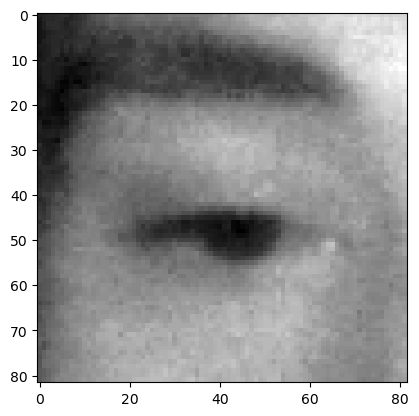

In [6]:
#Plot image with matplot
plt.imshow(img_array, cmap="gray")

In [7]:
#Len vs property shape -> 82,82
#len(img_array) 82
img_array.shape

(82, 82)

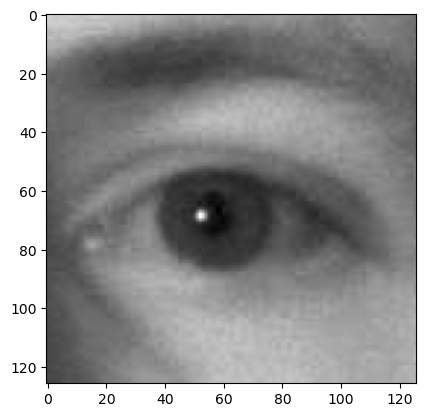

In [8]:
folders = [oe,ce]
for folder in folders:
    path = os.path.join(FOLDER, folder)
    for img in os.listdir(path):
        #img = os.path.join(path + "\\" + img)
        img_array = cv2.imread(os.path.join(path + "/" + img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

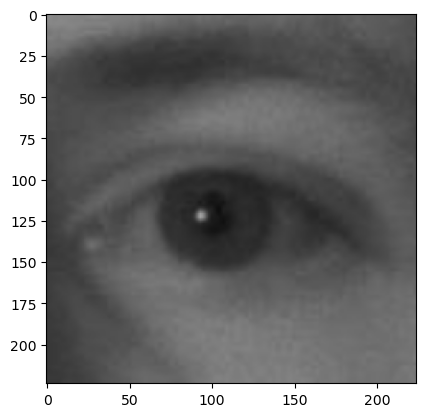

In [9]:
##Resize image
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array,cmap="gray")
plt.show()


In [11]:
##Reading all the images and converting to array for data and labels
training_data = []

def create_training_data():
    for folder in folders:
        path = os.path.join(FOLDER, folder)
        class_num = folders.index(folder) #0,1
        for img in os.listdir(path)[:len(os.listdir(path))//4]:
            try:
                img_array = cv2.imread(os.path.join(path + "/" + img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                #plt.imshow(img_array, cmap="gray")
                #plt.show()
                #break
                training_data.append([new_array, class_num])
            except Exception as e:
                pass      

In [12]:
create_training_data()

In [13]:
print(len(training_data))

21224


In [14]:
import random
random.shuffle(training_data)

In [ ]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
    
X = np.array(x).reshape(-1,img_size,img_size,3)

In [107]:
X.shape

(12000, 224, 224, 3)

In [108]:
#Normalise data
X = X/255.0

In [109]:
Y = np.array(y)

In [110]:
##Save data
import pickle

In [115]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [116]:
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [117]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [118]:
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)

In [ ]:
##Deep learning model for Training -- Transfer Learning

In [121]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [122]:
model = tf.keras.applications.mobilenet.MobileNet();

17225924/17225924 [==============================] - 3s 0us/step


In [123]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [124]:
#Transfer Learning


In [125]:
base_input = model.layers[0].input

In [126]:
base_output = model.layers[-4].output ##Select dropout layer as output

In [127]:
flat_layer = layers.Flatten()(base_output) ##Flatten output

In [128]:
final_output = layers.Dense(1)(flat_layer) ##Binary classification -> one node 1,0

In [129]:
final_output = layers.Activation('sigmoid')(final_output)

In [130]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [132]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [133]:
#Setting for binary classification (open/closed)
## for layer in model.layers:
##     layer.trainable = false
## Can freeze layers if you need some not re-trained

In [135]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [136]:
new_model.fit(X,Y, epochs=1, validation_split=0.1) # Training

338/338 [==============================] - 716s 2s/step - loss: 0.0474 - accuracy: 0.9862 - val_loss: 0.1760 - val_accuracy: 0.9650


In [137]:
#Save model
new_model.save("model_v0.1")

INFO:tensorflow:Assets written to: model_v0.1\assets


INFO:tensorflow:Assets written to: model_v0.1\assets


In [138]:
#Load model
new_model = tf.keras.models.load_model("model_v0.1")

In [139]:
#Check prediction

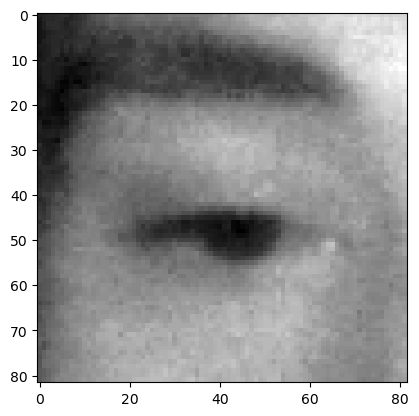

In [141]:
##Read image with cv2
img_array = cv2.imread(pth + "\s0001_01842_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
#Plot image with matplot
plt.imshow(img_array, cmap="gray")

In [142]:
#Resize
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [144]:
#Resize to input
x_input = np.array(new_array).reshape(1, img_size,img_size, 3)
x_input.shape

(1, 224, 224, 3)

In [147]:
#Normalise

In [149]:
x_input = x_input /255.0

In [150]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 0s 451ms/step


In [151]:
prediction

array([[0.16998123]], dtype=float32)

In [152]:
##Check unknown images

In [279]:
closed_img = cv2.imread("closed.jpg")

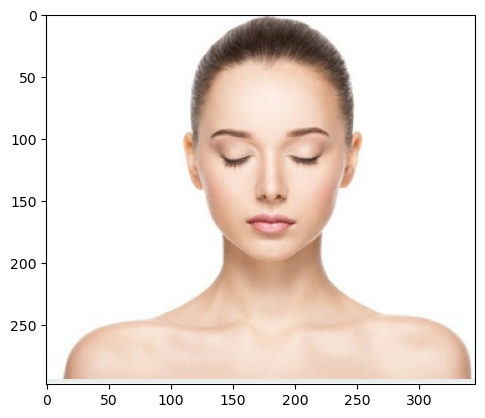

In [317]:
plt.imshow(cv2.cvtColor(closed_img,cv2.COLOR_BGR2RGB))

In [299]:
##Crop the eyes - Haars cascade face detection

file_path = 'haarcascade_eye.xml'

if os.path.exists(file_path):
    print('The file exists!')
else:
    print('The file does not exist.')

The file exists!


In [309]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [310]:
faceCascade.empty()

False

In [314]:
eyeCascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [315]:
eyeCascade.empty()

False

In [281]:
##Must convert to gray
gray = cv2.cvtColor(closed_img, cv2.COLOR_BGR2GRAY)

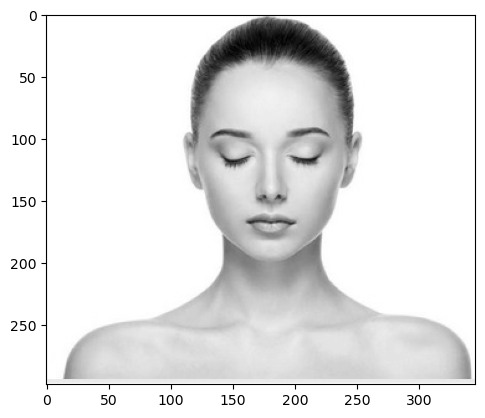

In [316]:
plt.imshow(gray, cmap="gray")

In [318]:
gray.shape

(298, 346)

In [321]:
eyes = eyeCascade.detectMultiScale(gray,1.1,3)

In [322]:
eyes

array([[159, 148,  41,  41],
       [131,  90,  49,  49]])

In [323]:
for(x, y, w, h) in eyes:
    cv2.rectangle(closed_img, (x,y), (x+w, y+h), (0,255,0),2)

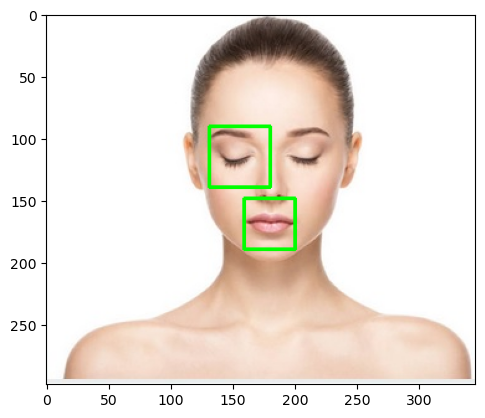

In [324]:
plt.imshow(cv2.cvtColor(closed_img,cv2.COLOR_BGR2RGB))

In [343]:
##Crop the image
eyeCascade =  cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(closed_img, cv2.COLOR_BGR2GRAY)

eyes = eyeCascade.detectMultiScale(gray,1.1,2)
for(x, y, w, h) in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color= closed_img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray,1.1,2)
    if(len(eyess) == 0):
        print("eyes are not detected")
    else:
        for(ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
            eyes_roi.shape


eyes are not detected
eyes are not detected


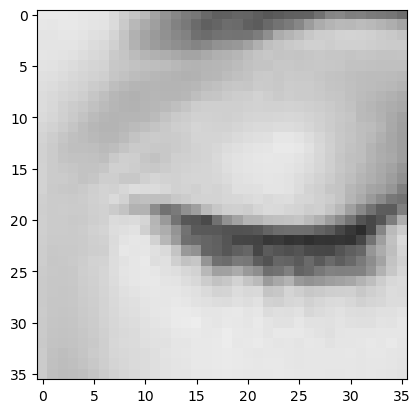

In [345]:
plt.imshow(cv2.cvtColor(roi_gray, cv2.COLOR_BGR2RGB))

In [351]:
eyess = eyeCascade.detectMultiScale(roi_gray,1.1,2)
eyess

()